# 声明合并

TypeScript 中的每一个声明至少产生 `namespace`, `type`, `value` 中的一种。具体如下：

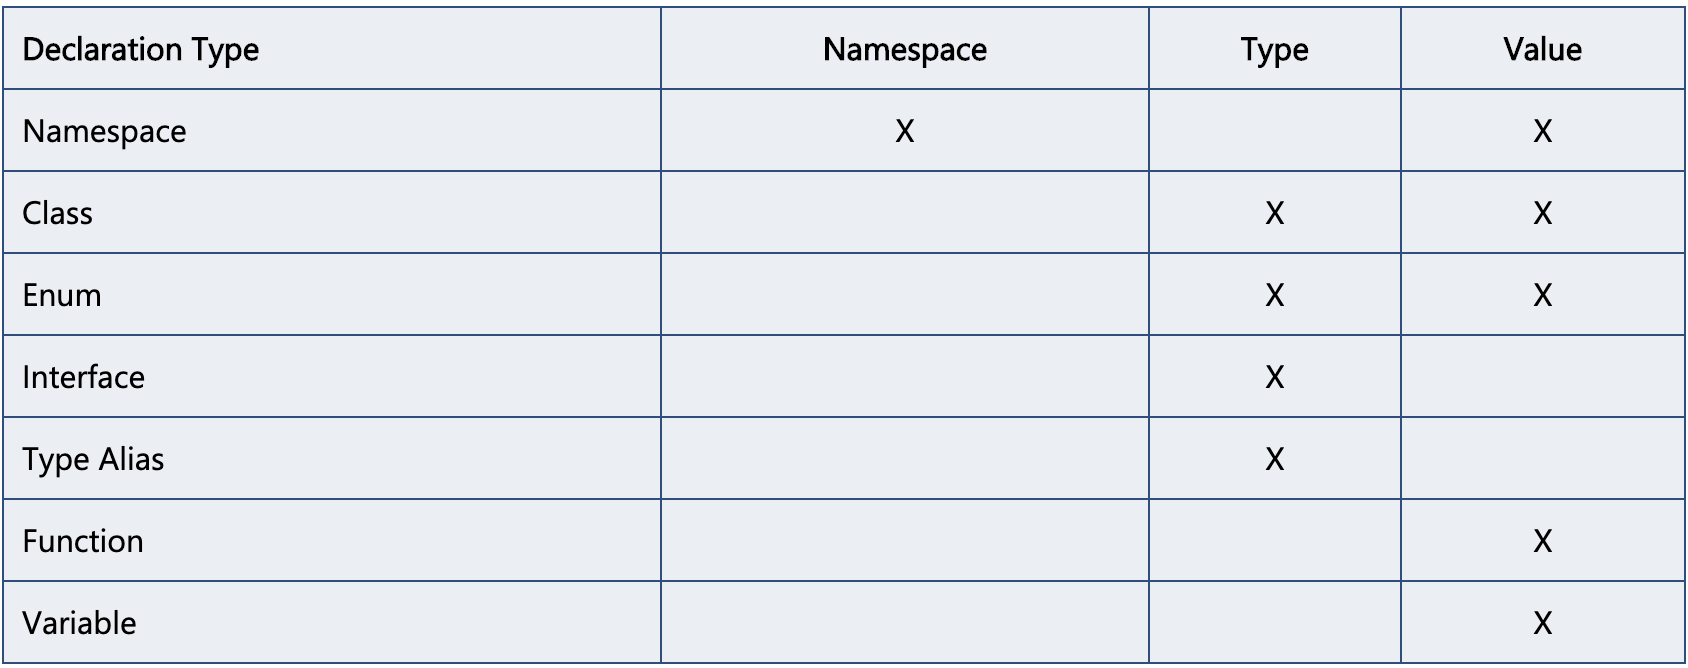

重复声明可能会触发声明合并：

## 接口合并

```ts
interface Box {
    width: number
    height: number
}

interface Box {
    scale: number
}
```

会合并为：

```ts
interface Box {
    width: number
    height: number
    scale: number
}
```

接口合并有以下规则：

- 对于非函数成员，如果出现合并，前后类型必须一致
- 对于函数成员，同名成员将会产生一个重载函数

以下将会和前边的声明冲突：

```ts
// ❌
interface Box {
    scale: string
}
```

## 命名空间合并

命名空间和接口类似，但是有以下规则：

- 未导出的成员只能在自身命名空间内访问
- 前边的命名空间不能访问后续的成员

#### 未导出的成员只能在自身命名空间内访问

```ts
// ❌ Cannot find name 'x'.
namespace Test {
    const x = 8
}
namespace Test {
    const y = x
}
```

#### 前边的命名空间不能访问后续的成员

```ts
// ❌ Block-scoped variable 'x' used before its declaration.
namespace Test {
    const x = 8
}
namespace Test {
    const y = x
}
```

## 命名空间与其他类型合并

命名空间和类合并：可以用于创建类的静态属性：

```ts
class Button {
    size: Button.Size
    constructor(size: Button.Size) {
        this.size = size
    }
}

namespace Button {
    export type Size = 'small' | 'big'
}
    
function createButton(size: Button.Size) {
    return new Button(size)
}

createButton('big')
```

## 非法合并

类不能和其他类合并。
